Physics 474 - Spring 2023 <br>
Homework 2 - Fitting Data, Parameter Estimation and Confidence Interval

<font color='red'>Author: Dillon Walton

_________________________________________________________________________________
In this homework we will practice fitting a function with parameters to some data. 
In addition, we will place some emphisis also on determining the confidence interval for
the fit parameters.

skills we will excercise:
- reading in data
- plotting data
- writing user defined functions
- fitting a function to data with 'curve_fit'
- calculating $\chi^2$ and $\chi^2$ probaility
- plotting residuals
- dtermining confidence intervals using the $\Delta \chi^2$
- analyzing data and making observations

__________________________________________________________________________

We will be investgating something called the Cosmic Microwave Background or CMB for short.

Quoted from Wikipedia:

_"In Big Bang cosmology the cosmic microwave background (CMB, CMBR) is electromagnetic radiation that is a remnant from a primordial stage of the universe, also known as "relic radiation". The CMB is faint cosmic background radiation filling all space. It is an important source of data on the early universe because it is the oldest electromagnetic radiation in the universe, dating to the epoch of recombination when the first atoms were formed. With a standard optical telescope, the background space between stars and galaxies is almost completely dark. However, a sufficiently sensitive radio telescope detects a faint background glow that is almost uniform and is not associated with any star, galaxy, or other object. This glow is strongest in the microwave region of the radio spectrum. The accidental discovery of the CMB in 1965 by American radio astronomers Arno Penzias and Robert Wilson was the culmination of work initiated in the 1940s, and earned the discoverers the 1978 Nobel Prize in Physics."_


We will be using measurements of CMB microwave intensity (W/m^2/sr/Hz) vs microwave frequency (GHz)
compiled around 2000 in the source 

**Salvaterra and Burigana, 2000 arXiv:astro-ph/0206350**

I have compiled the data into an easily read NumPy binary data file

"CMB_Intensity_Data.npz"

We will use this data to:
- plot the intensity vs frequency
- fit the data to a blackbody intensity vs frequency function to estimate the best-fit Temperature
- plot the data along with the best fit
- plot the residuals (fractional residuals in this particular case)
- calcultae the best-fit $\chi^2$
- use the $\Delta \chi^2$ as a function of temperature to estimate the confidence intervals for fit temperature
_________________________________________________________________________________________

Background for the problem:

Black-Body Radiation

Every physical body (including the CMB surface) of temperature $T$ spontaneously and continuously emits electromagnetic radiation of radiance $I(f;T)$ which describes the spectral emissive power per unit area, per unit solid angle, per unit frequency for particular radiation frequencies $f$. The relationship is given by Planck's radiation law

$ \,\,\,\,\,\,\,{\Large I(f;T) = \frac{2h}{c^2}\frac{f^3}{e^{hf/kT}-1} }$

where $h$ is Plank's constant, $k$ is Boltzman's constant and $c$ is the speed of light.
___________________________________________________________________

You are given data for measurments of $I$ vs frequency $f$ and are being asked to find the temperature $T$ that gives the best-fir between Plank's law and the data. You will then compare the best-fit to the data and estimate the confidence interval on the parameter $T$.
___________________________________________________________________________


Part 1) (2 pts)

Read in the datafile 'CMB_Intensity_Data.npz' and print the "keys" in the file

e.g.

filename = 'CMB_Intensity_Data.npz'<br>
Data = np.load(filename)<br>
print(Data.files)

In [2]:
# Your code...
import numpy as np

filename = 'CMB_Intensity_Data.npz'
data = np.load(filename)
print(f"Keys: {data.files}")

Keys: ['description', 'frequency', 'intensity', 'error']


Print the 'description' 

e.g. 

print(Data['description'])

In [3]:
# Your code...
import numpy as np

print(f"Description: {data['description']}")

Description: ['-----------------------------------------------'
 'This file contains data for Cosmic Microwave Background (CMB)'
 'Data compiled from salvaterra and burigana, 2000 arXiv:astro-ph/0206350'
 'Intensity measurements versus microwave frequency'
 'The data is given as frequency (GHz)'
 'CMB Intensity (W/m^2/sr/Hz) and error on Intensity'
 'description = this text describing data'
 'frequency = Frequency of mesurement in GHz'
 'intensity = CMB Intensity (W/m^2/sr/Hz)'
 'error = estimated experimental uncertainty of intensity in same units'
 'NOTE:' 'Removed 1 data point f= 113.6 Ghz T=2.279 K'
 'and used delta_T = 0.025K in place of 0.01K for last 40 points'
 '--------------------------------------------------']


Part 2)  (3 pts)

Make a plot of the data with errorbars vs frequency [GHz]
- use log scale for both x and y axes
- set x-ticks at 0.1, 1, 10, 100, 1000 GHz

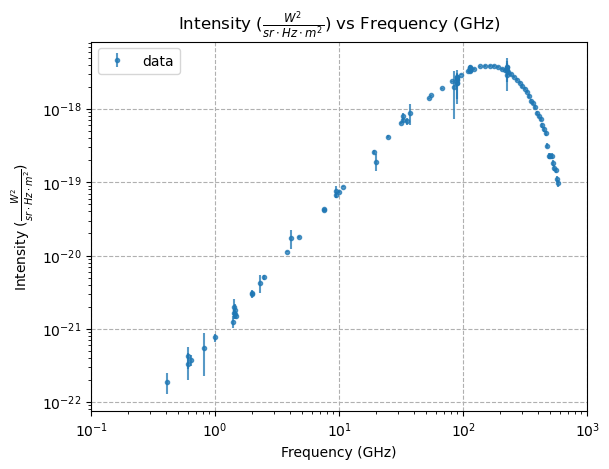

In [195]:
# Your code...
import matplotlib.pyplot as plt
import numpy as np

filename = 'CMB_Intensity_Data.npz'
data = np.load(filename)

x_ticks = [0.1,1,10,100,1000]

plt.figure()
plt.errorbar(data['frequency'],data['intensity'],yerr=data['error'],fmt='.',label='data', alpha=0.75)
plt.xscale('log')
plt.yscale('log')
plt.grid(True,linestyle='--')
plt.title(r'Intensity ($\frac{W^2}{sr \cdot Hz \cdot m^2} $) vs Frequency (GHz)')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'Intensity ($\frac{W^2}{sr \cdot Hz \cdot m^2} $)')
plt.xticks(x_ticks)
plt.legend()
plt.show()


______________________________________________________________
Part 3a) (3 pts)

fit the data above to Plank's law to get the best fit temperature
- print the best fit temperature
- print the estimated 1-$\sigma$ error returned by curve_fit
_____________________________________________________________

In [202]:
# Your code...
import numpy as np
from scipy.optimize import curve_fit


filename = 'CMB_Intensity_Data.npz'
data = np.load(filename)

h = 6.626 * 10**(-34)
c = 3 * 10**(8)
k = 1.38 * 10**(-23)

def objective(f,T):
    n = (2*h) * (1/(c**2)) * (f**3)
    return n * (1/(np.exp((h*f)*(1/(k*T)))-1))

param, param_cov = curve_fit(objective, data['frequency']*(10**9), data['intensity'], sigma=data['error'], absolute_sigma=True)
sorted_freq = np.sort(data['frequency'])
fit = objective(sorted_freq*(10**9), param[0])

perr = np.sqrt(np.diag(param_cov))

fitted_temp = param[0]
one_sigma = perr[0]

print(r'Best Fit Temperature: {:.3f}'.format(fitted_temp))
print(r'Best Fit 1-sigma error: {:.3f}'.format(one_sigma))



Best Fit Temperature: 2.730
Best Fit 1-sigma error: 0.004


____________________________________________________________________
Part 3b) (2 pts)

Calculate and print the $\chi^2$, reduced-$\chi^2$, and $\chi^2$ probability

______________________________________________________________

In [135]:
# Your code...
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as st


filename = 'CMB_Intensity_Data.npz'
data = np.load(filename)

h = 6.626 * 10**(-34)
c = 3 * 10**(8)
k = 1.38 * 10**(-23)

def objective(f,T):
    n = (2*h) * (1/(c**2)) * (f**3)
    return n * (1/(np.exp((h*f)*(1/(k*T)))-1))

def chi_squared(Theory,Data,sigma):
    if np.size(Theory)==np.size(Data) and np.size(Data)==np.size(sigma):
        chi2=np.sum((Theory-Data)**2/sigma**2)
        return chi2
    else:
        print('error - arrays of unequal size')
        return -1.

param, param_cov = curve_fit(objective, data['frequency']*(10**9), data['intensity'], sigma=data['error'], absolute_sigma=True)
sorted_freq = np.sort(data['frequency'])
fit = objective(sorted_freq*(10**9), param[0])

chi2 = chi_squared(objective(data['frequency']*(10**9), param[0]), data['intensity'], data['error'])
dof = len(fit) - 1
prob = st.chi2.sf(chi2,dof)

print(r'Chi Squared: {:.2f}'.format(chi2))
print(r'Reduced Chi Squared: {:.2f}'.format(chi2/dof))
print(r'Chi Squared Probability: {:.3f}'.format(prob))

Chi Squared: 117.36
Reduced Chi Squared: 1.28
Chi Squared Probability: 0.038


_________________________________________________________________________
Observations:
I am surprised at the low value of the probability. Additionally, I was getting a chi squared value around 1000 as I had sorted my frequency array to make for a more clean plot. However, this resulted in a huge discrepency between theory and data, I noticed it and adjusted the chi squared calculation to use the unsorted frequency array. Further, I have to say it was slightly offputting using only one fitting parameter in my DoF calculation vs the normal two for the linear fit. Finally, it seems my Reduced Chi Squared value is within an acceptable range, though slightly high and my probability is a little lower than I would have hoped, but just outside of the confidence interval.
_______________________________________________________________________

Part 4) (5 pts)

Make a single figure with two subplots
- top: data with errorbars and best fit curve vs frequency (same parameters as plot above)
- bottom: fractional residuals (i.e residual/Radiance = (data-Fit)/fit) with errorbar (only log on x-scale)


_________________________________________________________________________

Text(0.5, 1.0, 'Intensity residuals vs Frequency (GHz)')

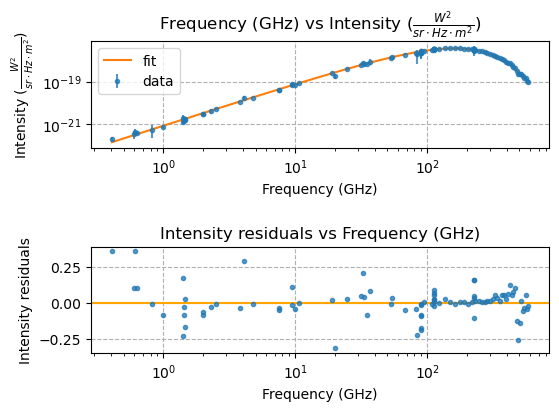

In [193]:
# Your code...
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


filename = 'CMB_Intensity_Data.npz'
data = np.load(filename)

h = 6.626 * 10**(-34)
c = 3 * 10**(8)
k = 1.38 * 10**(-23)

def objective(f,T):
    n = (2*h) * (1/(c**2)) * (f**3)
    return n * (1/(np.exp((h*f)*(1/(k*T)))-1))

param, param_cov = curve_fit(objective, data['frequency']*(10**9), data['intensity'], sigma=data['error'], absolute_sigma=True)
sorted_freq = np.sort(data['frequency'])
fit = objective(sorted_freq*(10**9), param[0])

fig, axs = plt.subplots(2)
fig.tight_layout(pad=5.0)

x_ticks = [0.1,1,10,100,1000]

axs[0].errorbar(data['frequency'],data['intensity'],yerr=data['error'],fmt='.',label='data', alpha=0.75)
axs[0].plot(sorted_freq,fit,label='fit')
axs[0].grid(True,linestyle='--')
axs[0].set_title(r'Frequency (GHz) vs Intensity ($\frac{W^2}{sr \cdot Hz \cdot m^2} $)')
axs[0].set_xlabel('Frequency (GHz)')
axs[0].set_xticks(x_ticks)
axs[0].set_ylabel(r'Intensity ($\frac{W^2}{sr \cdot Hz \cdot m^2} $)')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

axs[1].axhline(y=0, color='orange')
axs[1].errorbar(data['frequency'], ((data['intensity']-objective(data['frequency']*(10**9), param[0]))/objective(data['frequency']*(10**9), param[0])),yerr=data['error'],fmt='.', alpha=0.75)
axs[1].grid(True,linestyle='--')
axs[1].set_xlabel('Frequency (GHz)')
axs[1].set_xticks(x_ticks)
axs[1].set_ylabel(r'Intensity residuals')
axs[1].set_xscale('log')
axs[1].set_title(r'Intensity residuals vs Frequency (GHz)')


_____________________________________________________________________
Observations: First is important to notice the density of data points at higher frequencies. It is no surprise our fit is weaker in the lower frequency range, which is reflected in the fractional residuals graph. As the density of data points increases near the high end of frequencies, the fit is stronger. This leads us to conclude that our fit will increase in accuracy as we collect more data points (which is obviously true). Further, since the units was cancelled in calculating the residual, I lost the error bars and was not exactly sure how to adjust them.
____________________________________________________________________

Part 5) (5 pts)

Now calculate the $\Delta\chi^2$ vs temperature for $\pm \, 4\sigma$ (based on return of curve_fit) around the best-fit temperature $T_{fit}$. That is:

$\Delta\chi^2 (T) = \chi^2 (T) - \chi^2 (T_{fit})$

make a plot
- $\Delta\chi^2 (T)$ vs T
- vertical line at $T_{fit}$
- vertical dotted line at currrent world best estimate of $T=2.72548 \, K$
- horizontal lines at $\Delta\chi^2$ of 1, 4, 9 

______________________________________________________________________

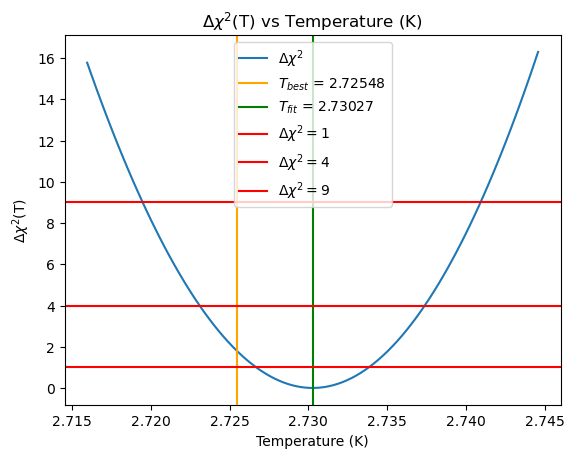

In [204]:
# Your code...
import numpy as np
from scipy.optimize import curve_fit


filename = 'CMB_Intensity_Data.npz'
data = np.load(filename)

h = 6.626 * 10**(-34)
c = 3 * 10**(8)
k = 1.38 * 10**(-23)

def objective(f,T):
    n = (2*h) * (1/(c**2)) * (f**3)
    return n * (1/(np.exp((h*f)*(1/(k*T)))-1))

def chi_squared(Theory,Data,sigma):
    if np.size(Theory)==np.size(Data) and np.size(Data)==np.size(sigma):
        chi2=np.sum((Theory-Data)**2/sigma**2)
        return chi2
    else:
        print('error - arrays of unequal size')
        return -1.

param, param_cov = curve_fit(objective, data['frequency']*(10**9), data['intensity'], sigma=data['error'], absolute_sigma=True)
sorted_freq = np.sort(data['frequency'])
fit = objective(sorted_freq*(10**9), param[0])

chi2 = chi_squared(objective(data['frequency']*(10**9), param[0]), data['intensity'], data['error'])
dof = len(fit) - 1
prob = st.chi2.sf(chi2,dof)

perr = np.sqrt(np.diag(param_cov))

fitted_temp = param[0]
one_sigma = perr[0]
four_sigma = 4*one_sigma


n_bins = 100
T=np.linspace((fitted_temp-four_sigma),(fitted_temp+four_sigma),n_bins)
delta_chi = []
for i in range(n_bins):
    theory = objective(data['frequency']*(10**9), T[i])
    chi = chi_squared(theory, data['intensity'], data['error'])
    delta_chi.append(chi-chi2)

plt.plot(T, delta_chi, label=r'$\Delta \chi^2$')
plt.axvline(x=2.72548, color='orange', label=r'$T_{best}$ = 2.72548')
plt.axvline(x=fitted_temp, color='green', label=r'$T_{fit}$ = 2.73027')
plt.axhline(y=1, color='red', label=r'$\Delta \chi^2 = 1$')
plt.axhline(y=4, color='red', label=r'$\Delta \chi^2 = 4$')
plt.axhline(y=9, color='red', label=r'$\Delta \chi^2 = 9$')
plt.xlabel(r'Temperature (K)')
plt.ylabel(r'$\Delta \chi^2$(T)')
plt.title(r'$\Delta \chi^2$(T) vs Temperature (K)')
plt.legend()
plt.show()

_______________________________________________________________________
Summary and Conclusions:

(comment on)
- what do the horizontal lines at $\Delta\chi^2$ of 1, 4, 9 represent?
- what are the approximate 68% and 95% confidence intevals on the fit temperature from this data?
- what do these confidence intervals represent?
- how do the $\Delta\chi^2$ of 1, 4, 9 compare to the estimate of the 1-sigma error retuned by curve fit?


_________________________________________________________________________

- The horizontal lines at 1, 4 and 9 on the $\Delta \chi^2$ axis represent the values of $ \pm 1 \sigma, 2 \sigma, 3 \sigma $ from $ T_{fit} $. It looks like the best known value is $ 1 \sigma \leq T_{best} \leq 2 \sigma $.
- The 68% confidence interval is approximately $ 2.726 \leq T \leq 2.734 $. The 95% confidence interval is approximately $ 2.723 \leq T \leq 2.737 $. If we want to look even further, the 99% confidence interval is approximately $ 2.720 \leq T \leq 2.740 $.
- The confidence intervals represent the values for temperature within $ \pm 1 \sigma, 2 \sigma, 3 \sigma $ (respectively) from $ T_{fit} $. As we increase our bounds by $ n \sigma $, we increase the confidence we have that a value T will fall within the bounds (given the data we have).
- This is an interesting observation. The $\Delta \chi^2$ looks to be $ \approx 1 \sigma $ found in the fit. This is expected, but still very interesting to see the same value derived through two means of calculating confidence intervals.  